In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: K
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


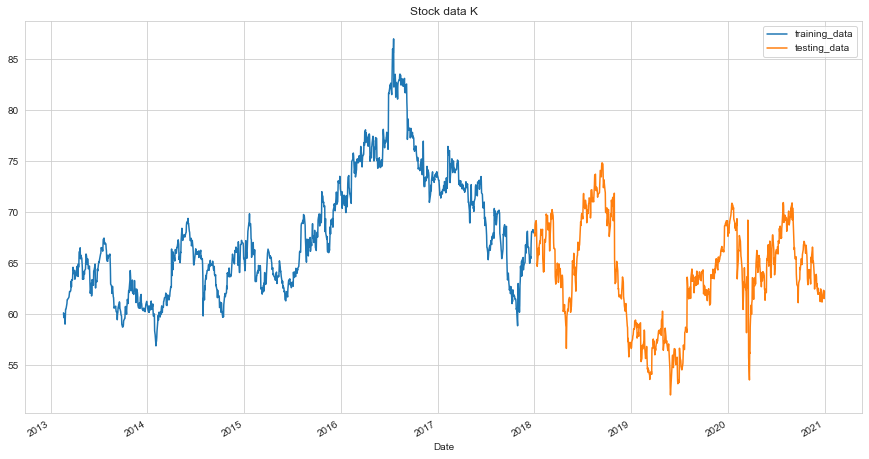

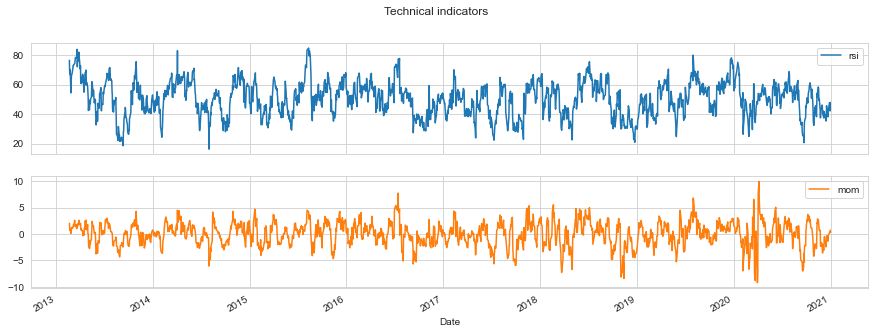

In [2]:
stock_name = 'k'.upper()
industry = 'Consumer defensive'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1104.60, duration: 0:00:00.358083
episode: 2/2000, episode end value: 1112.42, duration: 0:00:00.320073
episode: 3/2000, episode end value: 1080.85, duration: 0:00:00.398092
episode: 4/2000, episode end value: 1082.30, duration: 0:00:00.447100
episode: 5/2000, episode end value: 1104.30, duration: 0:00:00.441099
episode: 6/2000, episode end value: 1070.56, duration: 0:00:00.409089
episode: 7/2000, episode end value: 1075.39, duration: 0:00:00.386086
episode: 8/2000, episode end value: 1071.65, duration: 0:00:00.277061
episode: 9/2000, episode end value: 1084.01, duration: 0:00:00.304067
episode: 10/2000, episode end value: 1074.47, duration: 0:00:00.307071
episode: 11/2000, episode end value: 1073.17, duration: 0:00:00.305068
episode: 12/2000, episode end value: 1084.29, duration: 0:00:00.350083
episode: 13/2000, episode end value: 1073.83, duration: 0:00:00.271056
episode: 14/2000, episode end value: 1092.46, duration: 0:00:00.295073
episode: 15/200

episode: 117/2000, episode end value: 1095.32, duration: 0:00:00.444099
episode: 118/2000, episode end value: 1088.90, duration: 0:00:00.418092
episode: 119/2000, episode end value: 1091.58, duration: 0:00:00.400088
episode: 120/2000, episode end value: 1083.34, duration: 0:00:00.412094
episode: 121/2000, episode end value: 1074.95, duration: 0:00:00.440098
episode: 122/2000, episode end value: 1088.94, duration: 0:00:00.470106
episode: 123/2000, episode end value: 1091.36, duration: 0:00:00.377086
episode: 124/2000, episode end value: 1105.40, duration: 0:00:00.384085
episode: 125/2000, episode end value: 1086.84, duration: 0:00:00.343081
episode: 126/2000, episode end value: 1098.44, duration: 0:00:00.408093
episode: 127/2000, episode end value: 1091.13, duration: 0:00:00.419096
episode: 128/2000, episode end value: 1094.97, duration: 0:00:00.358077
episode: 129/2000, episode end value: 1088.93, duration: 0:00:00.361083
episode: 130/2000, episode end value: 1078.79, duration: 0:00:00

episode: 231/2000, episode end value: 1096.65, duration: 0:00:00.487106
episode: 232/2000, episode end value: 1110.40, duration: 0:00:00.452101
episode: 233/2000, episode end value: 1096.71, duration: 0:00:00.430096
episode: 234/2000, episode end value: 1100.70, duration: 0:00:00.396088
episode: 235/2000, episode end value: 1102.14, duration: 0:00:00.397090
episode: 236/2000, episode end value: 1105.77, duration: 0:00:00.417094
episode: 237/2000, episode end value: 1118.68, duration: 0:00:00.459102
episode: 238/2000, episode end value: 1109.19, duration: 0:00:00.443103
episode: 239/2000, episode end value: 1107.74, duration: 0:00:00.387088
episode: 240/2000, episode end value: 1112.92, duration: 0:00:00.451100
episode: 241/2000, episode end value: 1108.87, duration: 0:00:00.502114
episode: 242/2000, episode end value: 1108.51, duration: 0:00:00.463103
episode: 243/2000, episode end value: 1110.55, duration: 0:00:00.438096
episode: 244/2000, episode end value: 1097.10, duration: 0:00:00

episode: 345/2000, episode end value: 1092.55, duration: 0:00:00.389088
episode: 346/2000, episode end value: 1101.39, duration: 0:00:00.416095
episode: 347/2000, episode end value: 1104.26, duration: 0:00:00.342082
episode: 348/2000, episode end value: 1092.26, duration: 0:00:00.357084
episode: 349/2000, episode end value: 1083.46, duration: 0:00:00.445100
episode: 350/2000, episode end value: 1090.23, duration: 0:00:00.433099
episode: 351/2000, episode end value: 1104.87, duration: 0:00:00.417095
episode: 352/2000, episode end value: 1108.45, duration: 0:00:00.431092
episode: 353/2000, episode end value: 1099.36, duration: 0:00:00.407090
episode: 354/2000, episode end value: 1102.55, duration: 0:00:00.393090
episode: 355/2000, episode end value: 1099.50, duration: 0:00:00.358083
episode: 356/2000, episode end value: 1113.84, duration: 0:00:00.354078
episode: 357/2000, episode end value: 1111.88, duration: 0:00:00.372081
episode: 358/2000, episode end value: 1118.67, duration: 0:00:00

episode: 459/2000, episode end value: 1114.66, duration: 0:00:00.394091
episode: 460/2000, episode end value: 1116.80, duration: 0:00:00.376083
episode: 461/2000, episode end value: 1102.38, duration: 0:00:00.404090
episode: 462/2000, episode end value: 1108.64, duration: 0:00:00.416092
episode: 463/2000, episode end value: 1099.43, duration: 0:00:00.374084
episode: 464/2000, episode end value: 1097.22, duration: 0:00:00.360087
episode: 465/2000, episode end value: 1111.94, duration: 0:00:00.338073
episode: 466/2000, episode end value: 1109.35, duration: 0:00:00.386088
episode: 467/2000, episode end value: 1102.63, duration: 0:00:00.422096
episode: 468/2000, episode end value: 1109.13, duration: 0:00:00.417094
episode: 469/2000, episode end value: 1083.50, duration: 0:00:00.464103
episode: 470/2000, episode end value: 1095.38, duration: 0:00:00.388092
episode: 471/2000, episode end value: 1094.21, duration: 0:00:00.403088
episode: 472/2000, episode end value: 1091.33, duration: 0:00:00

episode: 573/2000, episode end value: 1109.34, duration: 0:00:00.391091
episode: 574/2000, episode end value: 1093.01, duration: 0:00:00.379084
episode: 575/2000, episode end value: 1109.64, duration: 0:00:00.348078
episode: 576/2000, episode end value: 1101.83, duration: 0:00:00.409093
episode: 577/2000, episode end value: 1104.87, duration: 0:00:00.444097
episode: 578/2000, episode end value: 1103.66, duration: 0:00:00.460109
episode: 579/2000, episode end value: 1093.01, duration: 0:00:00.406089
episode: 580/2000, episode end value: 1094.75, duration: 0:00:00.382086
episode: 581/2000, episode end value: 1099.86, duration: 0:00:00.432098
episode: 582/2000, episode end value: 1114.86, duration: 0:00:00.441098
episode: 583/2000, episode end value: 1103.99, duration: 0:00:00.385088
episode: 584/2000, episode end value: 1091.78, duration: 0:00:00.438100
episode: 585/2000, episode end value: 1126.02, duration: 0:00:00.353080
episode: 586/2000, episode end value: 1118.96, duration: 0:00:00

episode: 687/2000, episode end value: 1104.77, duration: 0:00:00.434097
episode: 688/2000, episode end value: 1103.80, duration: 0:00:00.384087
episode: 689/2000, episode end value: 1108.87, duration: 0:00:00.413096
episode: 690/2000, episode end value: 1104.34, duration: 0:00:00.413093
episode: 691/2000, episode end value: 1093.13, duration: 0:00:00.382085
episode: 692/2000, episode end value: 1103.05, duration: 0:00:00.419095
episode: 693/2000, episode end value: 1090.08, duration: 0:00:00.443101
episode: 694/2000, episode end value: 1106.97, duration: 0:00:00.399094
episode: 695/2000, episode end value: 1104.85, duration: 0:00:00.389084
episode: 696/2000, episode end value: 1105.78, duration: 0:00:00.391082
episode: 697/2000, episode end value: 1105.37, duration: 0:00:00.490110
episode: 698/2000, episode end value: 1092.91, duration: 0:00:00.442099
episode: 699/2000, episode end value: 1105.13, duration: 0:00:00.407091
episode: 700/2000, episode end value: 1101.14, duration: 0:00:00

episode: 801/2000, episode end value: 1109.35, duration: 0:00:00.401093
episode: 802/2000, episode end value: 1102.27, duration: 0:00:00.369084
episode: 803/2000, episode end value: 1101.37, duration: 0:00:00.369081
episode: 804/2000, episode end value: 1110.06, duration: 0:00:00.418100
episode: 805/2000, episode end value: 1105.14, duration: 0:00:00.435103
episode: 806/2000, episode end value: 1107.83, duration: 0:00:00.373078
episode: 807/2000, episode end value: 1099.96, duration: 0:00:00.435098
episode: 808/2000, episode end value: 1105.94, duration: 0:00:00.369083
episode: 809/2000, episode end value: 1097.37, duration: 0:00:00.426096
episode: 810/2000, episode end value: 1108.09, duration: 0:00:00.451107
episode: 811/2000, episode end value: 1114.26, duration: 0:00:00.352079
episode: 812/2000, episode end value: 1094.79, duration: 0:00:00.453107
episode: 813/2000, episode end value: 1094.53, duration: 0:00:00.399088
episode: 814/2000, episode end value: 1105.98, duration: 0:00:00

episode: 915/2000, episode end value: 1096.99, duration: 0:00:00.398090
episode: 916/2000, episode end value: 1089.84, duration: 0:00:00.390089
episode: 917/2000, episode end value: 1107.48, duration: 0:00:00.340078
episode: 918/2000, episode end value: 1104.75, duration: 0:00:00.413093
episode: 919/2000, episode end value: 1085.94, duration: 0:00:00.409090
episode: 920/2000, episode end value: 1087.32, duration: 0:00:00.401090
episode: 921/2000, episode end value: 1090.76, duration: 0:00:00.438099
episode: 922/2000, episode end value: 1094.47, duration: 0:00:00.468107
episode: 923/2000, episode end value: 1081.74, duration: 0:00:00.460104
episode: 924/2000, episode end value: 1088.64, duration: 0:00:00.458102
episode: 925/2000, episode end value: 1086.61, duration: 0:00:00.407088
episode: 926/2000, episode end value: 1092.45, duration: 0:00:00.418092
episode: 927/2000, episode end value: 1084.88, duration: 0:00:00.483109
episode: 928/2000, episode end value: 1081.58, duration: 0:00:00

episode: 1029/2000, episode end value: 1103.23, duration: 0:00:00.409091
episode: 1030/2000, episode end value: 1102.48, duration: 0:00:00.402090
episode: 1031/2000, episode end value: 1100.16, duration: 0:00:00.406095
episode: 1032/2000, episode end value: 1101.98, duration: 0:00:00.427095
episode: 1033/2000, episode end value: 1106.05, duration: 0:00:00.477107
episode: 1034/2000, episode end value: 1099.56, duration: 0:00:00.411092
episode: 1035/2000, episode end value: 1097.43, duration: 0:00:00.325074
episode: 1036/2000, episode end value: 1089.22, duration: 0:00:00.389089
episode: 1037/2000, episode end value: 1114.42, duration: 0:00:00.358083
episode: 1038/2000, episode end value: 1101.04, duration: 0:00:00.420095
episode: 1039/2000, episode end value: 1096.76, duration: 0:00:00.420092
episode: 1040/2000, episode end value: 1103.75, duration: 0:00:00.348083
episode: 1041/2000, episode end value: 1098.85, duration: 0:00:00.398091
episode: 1042/2000, episode end value: 1108.83, dur

episode: 1142/2000, episode end value: 1079.88, duration: 0:00:00.427094
episode: 1143/2000, episode end value: 1094.45, duration: 0:00:00.393091
episode: 1144/2000, episode end value: 1094.30, duration: 0:00:00.342073
episode: 1145/2000, episode end value: 1103.20, duration: 0:00:00.425098
episode: 1146/2000, episode end value: 1100.56, duration: 0:00:00.411092
episode: 1147/2000, episode end value: 1107.03, duration: 0:00:00.423094
episode: 1148/2000, episode end value: 1096.39, duration: 0:00:00.474109
episode: 1149/2000, episode end value: 1110.78, duration: 0:00:00.333073
episode: 1150/2000, episode end value: 1103.97, duration: 0:00:00.410093
episode: 1151/2000, episode end value: 1105.61, duration: 0:00:00.444096
episode: 1152/2000, episode end value: 1120.60, duration: 0:00:00.437099
episode: 1153/2000, episode end value: 1108.30, duration: 0:00:00.408092
episode: 1154/2000, episode end value: 1099.00, duration: 0:00:00.431098
episode: 1155/2000, episode end value: 1105.19, dur

episode: 1255/2000, episode end value: 1087.41, duration: 0:00:00.430096
episode: 1256/2000, episode end value: 1083.21, duration: 0:00:00.490108
episode: 1257/2000, episode end value: 1077.52, duration: 0:00:00.414092
episode: 1258/2000, episode end value: 1083.16, duration: 0:00:00.444100
episode: 1259/2000, episode end value: 1085.17, duration: 0:00:00.420093
episode: 1260/2000, episode end value: 1075.86, duration: 0:00:00.425098
episode: 1261/2000, episode end value: 1096.00, duration: 0:00:00.364081
episode: 1262/2000, episode end value: 1087.11, duration: 0:00:00.343077
episode: 1263/2000, episode end value: 1094.17, duration: 0:00:00.406092
episode: 1264/2000, episode end value: 1096.75, duration: 0:00:00.355083
episode: 1265/2000, episode end value: 1105.94, duration: 0:00:00.392082
episode: 1266/2000, episode end value: 1104.52, duration: 0:00:00.366080
episode: 1267/2000, episode end value: 1117.82, duration: 0:00:00.381087
episode: 1268/2000, episode end value: 1111.21, dur

episode: 1368/2000, episode end value: 1104.97, duration: 0:00:00.351079
episode: 1369/2000, episode end value: 1096.93, duration: 0:00:00.350077
episode: 1370/2000, episode end value: 1104.16, duration: 0:00:00.429095
episode: 1371/2000, episode end value: 1108.58, duration: 0:00:00.427099
episode: 1372/2000, episode end value: 1090.20, duration: 0:00:00.457103
episode: 1373/2000, episode end value: 1102.42, duration: 0:00:00.381090
episode: 1374/2000, episode end value: 1095.04, duration: 0:00:00.441095
episode: 1375/2000, episode end value: 1112.54, duration: 0:00:00.471103
episode: 1376/2000, episode end value: 1111.16, duration: 0:00:00.468105
episode: 1377/2000, episode end value: 1106.36, duration: 0:00:00.385084
episode: 1378/2000, episode end value: 1102.65, duration: 0:00:00.390083
episode: 1379/2000, episode end value: 1109.56, duration: 0:00:00.424096
episode: 1380/2000, episode end value: 1103.23, duration: 0:00:00.453100
episode: 1381/2000, episode end value: 1106.34, dur

episode: 1481/2000, episode end value: 1113.28, duration: 0:00:00.364082
episode: 1482/2000, episode end value: 1091.80, duration: 0:00:00.377084
episode: 1483/2000, episode end value: 1110.34, duration: 0:00:00.370083
episode: 1484/2000, episode end value: 1098.37, duration: 0:00:00.485109
episode: 1485/2000, episode end value: 1093.66, duration: 0:00:00.400089
episode: 1486/2000, episode end value: 1085.66, duration: 0:00:00.378084
episode: 1487/2000, episode end value: 1106.51, duration: 0:00:00.339078
episode: 1488/2000, episode end value: 1090.90, duration: 0:00:00.432097
episode: 1489/2000, episode end value: 1086.71, duration: 0:00:00.426097
episode: 1490/2000, episode end value: 1090.61, duration: 0:00:00.402089
episode: 1491/2000, episode end value: 1099.15, duration: 0:00:00.365086
episode: 1492/2000, episode end value: 1093.28, duration: 0:00:00.394090
episode: 1493/2000, episode end value: 1116.53, duration: 0:00:00.414086
episode: 1494/2000, episode end value: 1133.45, dur

episode: 1594/2000, episode end value: 1104.77, duration: 0:00:00.363087
episode: 1595/2000, episode end value: 1090.45, duration: 0:00:00.452101
episode: 1596/2000, episode end value: 1107.58, duration: 0:00:00.401093
episode: 1597/2000, episode end value: 1097.29, duration: 0:00:00.366087
episode: 1598/2000, episode end value: 1094.32, duration: 0:00:00.370080
episode: 1599/2000, episode end value: 1095.53, duration: 0:00:00.430102
episode: 1600/2000, episode end value: 1085.62, duration: 0:00:00.364079
episode: 1601/2000, episode end value: 1093.70, duration: 0:00:00.322073
episode: 1602/2000, episode end value: 1088.56, duration: 0:00:00.303066
episode: 1603/2000, episode end value: 1107.17, duration: 0:00:00.351079
episode: 1604/2000, episode end value: 1100.43, duration: 0:00:00.400095
episode: 1605/2000, episode end value: 1102.84, duration: 0:00:00.364086
episode: 1606/2000, episode end value: 1111.13, duration: 0:00:00.328070
episode: 1607/2000, episode end value: 1097.18, dur

episode: 1707/2000, episode end value: 1113.89, duration: 0:00:00.371084
episode: 1708/2000, episode end value: 1107.38, duration: 0:00:00.387090
episode: 1709/2000, episode end value: 1110.91, duration: 0:00:00.440097
episode: 1710/2000, episode end value: 1094.71, duration: 0:00:00.423100
episode: 1711/2000, episode end value: 1098.42, duration: 0:00:00.403087
episode: 1712/2000, episode end value: 1102.07, duration: 0:00:00.407095
episode: 1713/2000, episode end value: 1096.15, duration: 0:00:00.425093
episode: 1714/2000, episode end value: 1107.41, duration: 0:00:00.342078
episode: 1715/2000, episode end value: 1090.04, duration: 0:00:00.362081
episode: 1716/2000, episode end value: 1108.15, duration: 0:00:00.354080
episode: 1717/2000, episode end value: 1096.44, duration: 0:00:00.359080
episode: 1718/2000, episode end value: 1089.77, duration: 0:00:00.402092
episode: 1719/2000, episode end value: 1102.55, duration: 0:00:00.317069
episode: 1720/2000, episode end value: 1099.85, dur

episode: 1820/2000, episode end value: 1086.79, duration: 0:00:00.373084
episode: 1821/2000, episode end value: 1117.39, duration: 0:00:00.276064
episode: 1822/2000, episode end value: 1092.44, duration: 0:00:00.286064
episode: 1823/2000, episode end value: 1107.69, duration: 0:00:00.289065
episode: 1824/2000, episode end value: 1100.03, duration: 0:00:00.325070
episode: 1825/2000, episode end value: 1097.29, duration: 0:00:00.350077
episode: 1826/2000, episode end value: 1093.18, duration: 0:00:00.322072
episode: 1827/2000, episode end value: 1101.31, duration: 0:00:00.299068
episode: 1828/2000, episode end value: 1107.82, duration: 0:00:00.299071
episode: 1829/2000, episode end value: 1103.98, duration: 0:00:00.365084
episode: 1830/2000, episode end value: 1117.74, duration: 0:00:00.410094
episode: 1831/2000, episode end value: 1122.59, duration: 0:00:00.381086
episode: 1832/2000, episode end value: 1118.75, duration: 0:00:00.311070
episode: 1833/2000, episode end value: 1113.78, dur

episode: 1933/2000, episode end value: 1104.06, duration: 0:00:00.258058
episode: 1934/2000, episode end value: 1095.13, duration: 0:00:00.281063
episode: 1935/2000, episode end value: 1084.38, duration: 0:00:00.279062
episode: 1936/2000, episode end value: 1084.45, duration: 0:00:00.265061
episode: 1937/2000, episode end value: 1097.83, duration: 0:00:00.266062
episode: 1938/2000, episode end value: 1107.65, duration: 0:00:00.270057
episode: 1939/2000, episode end value: 1097.28, duration: 0:00:00.276063
episode: 1940/2000, episode end value: 1103.91, duration: 0:00:00.283062
episode: 1941/2000, episode end value: 1107.14, duration: 0:00:00.263059
episode: 1942/2000, episode end value: 1097.23, duration: 0:00:00.272061
episode: 1943/2000, episode end value: 1103.20, duration: 0:00:00.285064
episode: 1944/2000, episode end value: 1111.70, duration: 0:00:00.266057
episode: 1945/2000, episode end value: 1106.47, duration: 0:00:00.274065
episode: 1946/2000, episode end value: 1086.39, dur

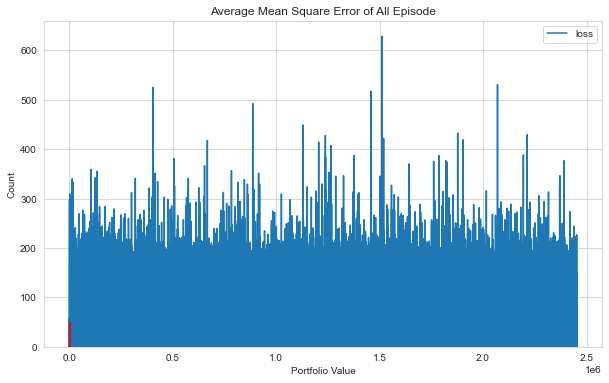

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

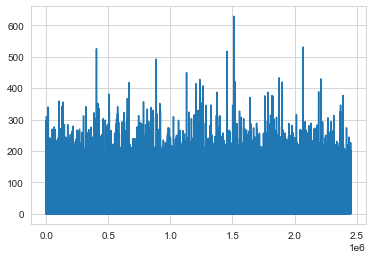

In [5]:
plt.plot(agent.model.losses)

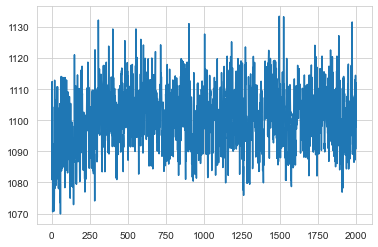

In [6]:
plt.plot(portfolio_value)

episode end value: 1063.19, duration: 0:00:00.086019
Sell: 178 times, Buy: 148 times


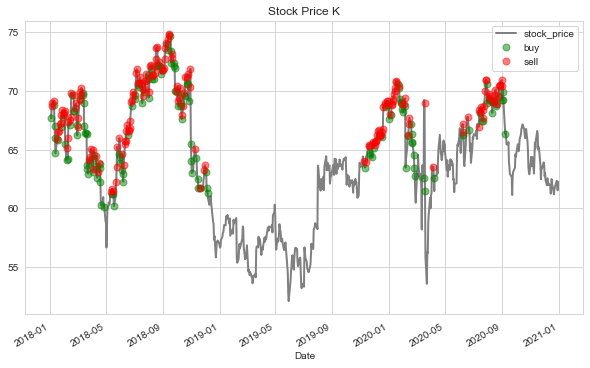

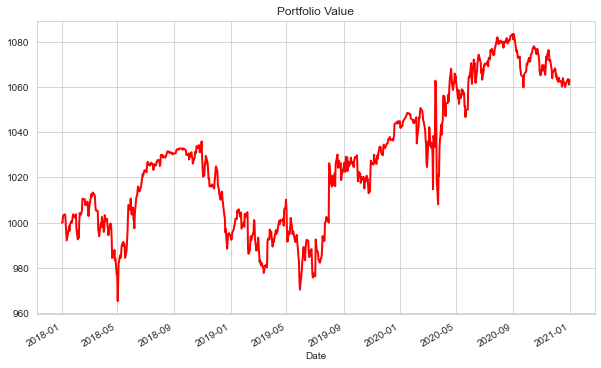

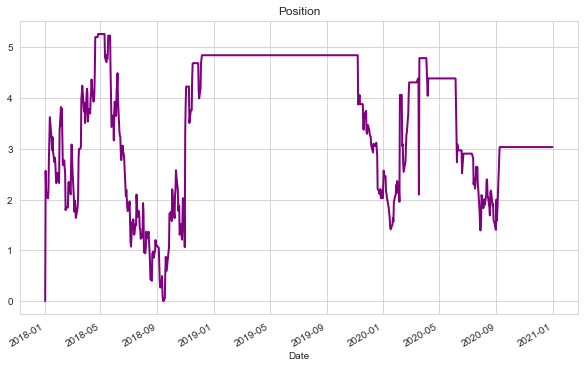

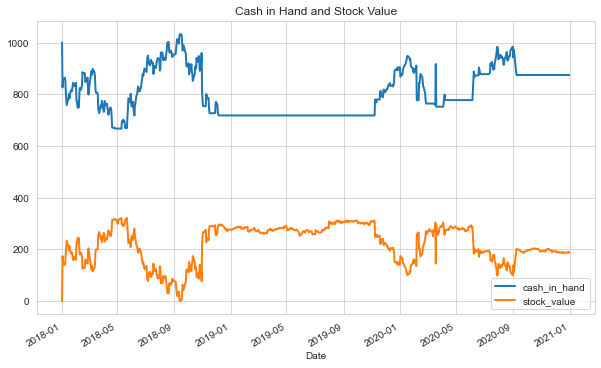

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: K
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 2.06 %
Volatility: 0.0597
shape ratio: 0.1613
Maximun drawdown: -6.33 %
Calmar ratio: 0.3258
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -2.90 %
Volatility (benchmark): 0.2578
shape ratio: -0.1551
Maximun drawdown: -30.40 %
Calmar ratio (benchmark): -0.0953


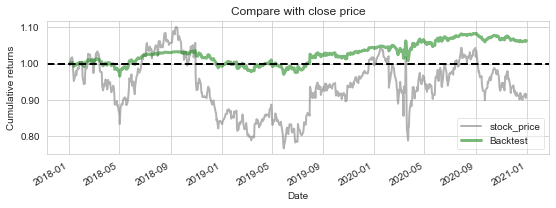

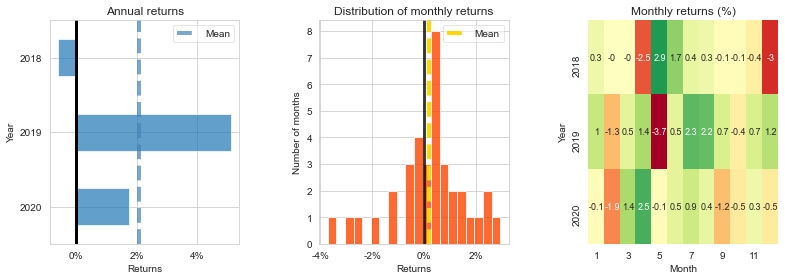

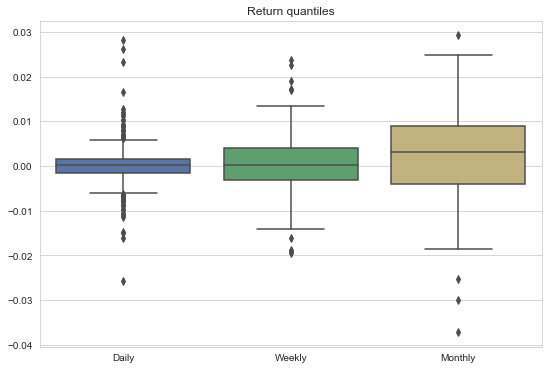

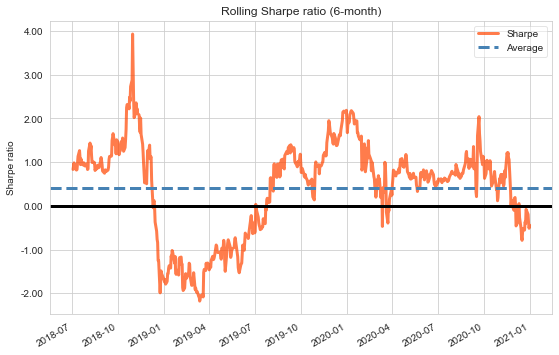

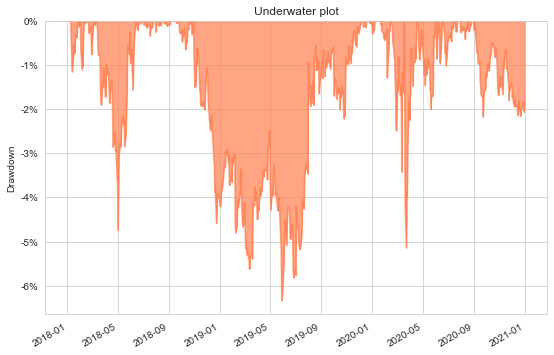

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')